### EDA: Segunda parte.



```fix
Requisitos: Haber ejecutado el archivo ETL.ipynb.
Librerías: Pandas, Numpy , matplotlib, seaborn. # pip install
```

En este notebook vamos a analizar las columnas del dataframe y luego su relación con la columna score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Leemos el archivo que guardamos en la carpeta de la API
data = pd.read_csv('./ProjectML_OPS_API/df.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22998 non-null  int64  
 1   show_id        22998 non-null  object 
 2   type           22998 non-null  object 
 3   title          22998 non-null  object 
 4   director       14739 non-null  object 
 5   cast           22998 non-null  object 
 6   country        11499 non-null  object 
 7   date_added     13444 non-null  object 
 8   release_year   22998 non-null  int64  
 9   rating_x       22998 non-null  object 
 10  duration       22053 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  id             22998 non-null  object 
 14  score          22998 non-null  float64
 15  duration_int   22998 non-null  int64  
 16  duration_type  22998 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 

In [3]:
#Eliminamos las columnas innecesarias.
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.drop('show_id', axis = 1, inplace = True)
data.drop('duration',axis = 1, inplace = True )


In [4]:
#Vemos los nulos en cada columna
data.isna().sum()

type                 0
title                0
director          8259
cast                 0
country          11499
date_added        9554
release_year         0
rating_x             0
listed_in            0
description          4
id                   0
score                0
duration_int         0
duration_type        0
dtype: int64

In [5]:
#Exploramos la columna country.
data['country'].value_counts()

united states                                            4997
india                                                    1203
united kingdom                                            583
japan                                                     515
canada                                                    237
                                                         ... 
spain, portugal                                             1
mexico, argentina                                           1
united kingdom, canada, united states, cayman islands       1
indonesia, united states                                    1
united states, spain, france, canada, united kingdom        1
Name: country, Length: 886, dtype: int64

In [6]:
#Para seguir, lleno los nulos con 'Sin Dato'
data['country'].fillna('Sin Dato',inplace= True)


In [7]:
# Graficamos los cinco primeros
x = data['country'].value_counts().index.tolist()
y = data['country'].value_counts().values.astype(float)
x = x[0:6]
y = y[0:6]


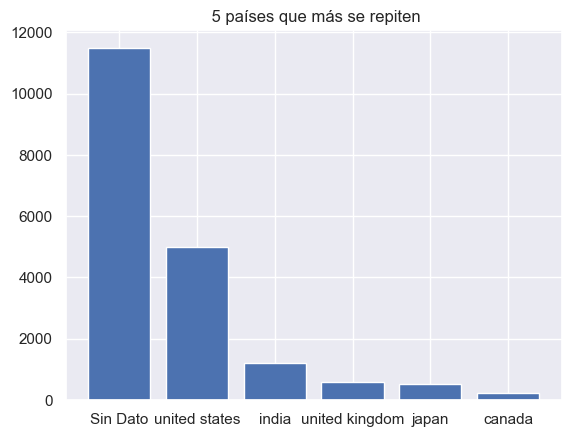

In [8]:
#Creamos un gráfico de barras para analizar los paises mas repetidos
plt.bar(x,y)
plt.title(' 5 países que más se repiten')
plt.show()

In [9]:
#Exploramos la columna date added
data['date_added'].value_counts()

2019-11-12    724
2020-01-01    146
2021-07-01    132
2021-09-01    107
2019-12-31    105
             ... 
2017-08-23      1
2015-12-28      1
2016-12-21      1
2016-03-02      1
2020-01-28      1
Name: date_added, Length: 2003, dtype: int64

In [10]:
#Exploramos la columna 
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_added'].value_counts()


2019-11-12    724
2020-01-01    146
2021-07-01    132
2021-09-01    107
2019-12-31    105
             ... 
2017-08-23      1
2015-12-28      1
2016-12-21      1
2016-03-02      1
2020-01-28      1
Name: date_added, Length: 2003, dtype: int64

In [11]:
#Dividimos la fecha en year_added, month_added
data['year_added'] = data['date_added'].dt.strftime('%Y')
data['month_added'] = data['date_added'].dt.strftime('%m')
data.head()

,type,title,director,cast,country,date_added,release_year,rating_x,listed_in,description,id,score,duration_int,duration_type,year_added,month_added
0,movie,dick johnson is dead,kirsten johnson,Sin Dato,united states,2021-09-25,2020,pg-13,documentaries,"as her father nears the end of his life, filmm...",ns1,3.611111,90,min,2021,09
1,tv show,blood & water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",ns2,3.552632,2,season,2021,09
2,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",Sin Dato,2021-09-24,2021,tv-ma,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,ns3,3.597938,1,season,2021,09
3,tv show,jailbirds new orleans,NaN,Sin Dato,Sin Dato,2021-09-24,2021,tv-ma,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo...",ns4,3.561616,1,season,2021,09
4,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...,ns5,3.593023,2,season,2021,09


In [12]:
#Los pasamos a enteros
data['year_added'].fillna('0',inplace= True)
data['month_added'].fillna('0',inplace= True)
data['year_added'] = data['year_added'].astype(int)
data['month_added'] = data['month_added'].astype(int)


In [15]:
data.isna().sum()

type                0
title               0
director         8259
cast                0
country             0
release_year        0
rating_x            0
listed_in           0
description         4
id                  0
score               0
duration_int        0
duration_type       0
year_added          0
month_added         0
dtype: int64

In [14]:
#Dropeamos date added.
data.drop('date_added', axis = 1, inplace= True)

In [16]:
#Exploramos director.
data['director'].value_counts()

mark knight                 113
cannis holder                61
jay chapman                  46
moonbug entertainment        37
arthur van merwijk           30
                           ... 
ding sheng                    1
jeremy coon, tim skousen      1
manish gupta                  1
hari viswanath                1
mark waring                   1
Name: director, Length: 10095, dtype: int64

In [17]:
#Llenamos los valores nulos con 'Sin Dato'
data['director'].fillna('Sin Dato',inplace= True)
x = data['director'].value_counts().index.tolist()
y = data['director'].value_counts().values.astype(float)
x = x[1:6]  #No tomemos en cuenta el Sin Dato
y = y[1:6]  #No tomemos en cuenta el Sin Dato


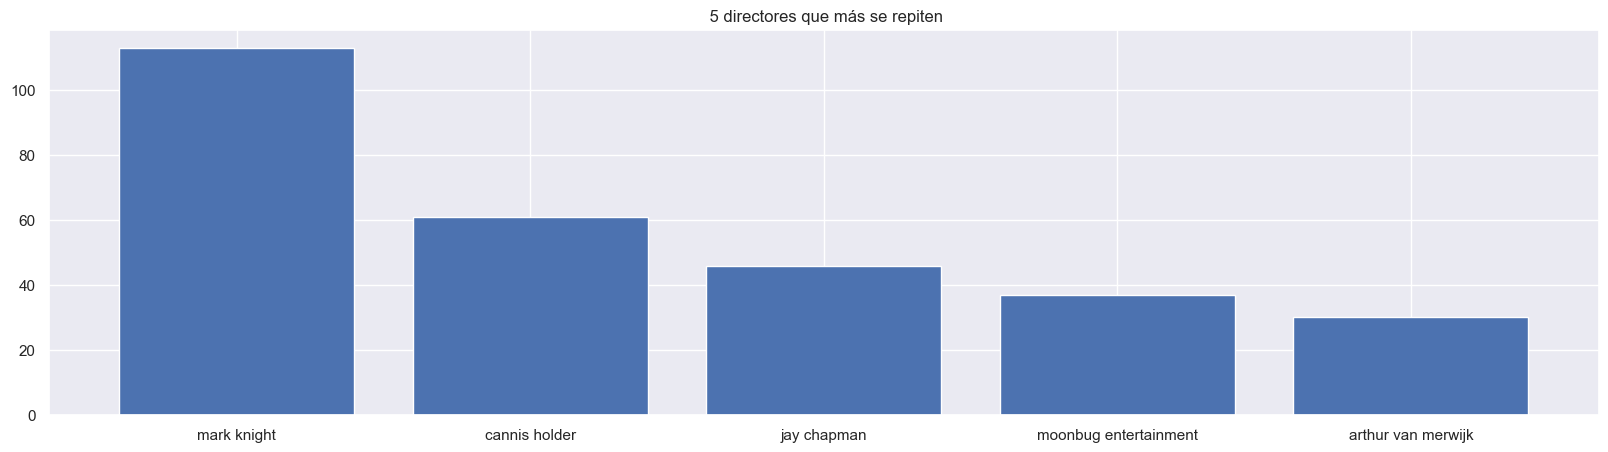

In [18]:
#Graficamos
plt.rcParams["figure.figsize"] = (20, 5)
plt.bar(x,y)
plt.title(' 5 directores que más se repiten')
plt.show()

In [19]:
#Llenamos los nulos en description con 'Sin Dato'
data['description'].fillna('Sin Dato',inplace= True)

In [20]:
data.isna().sum()
#Nos quedamos sin nulos.

type             0
title            0
director         0
cast             0
country          0
release_year     0
rating_x         0
listed_in        0
description      0
id               0
score            0
duration_int     0
duration_type    0
year_added       0
month_added      0
dtype: int64

In [21]:
#Exploramos la columna rating_x. Vemos que tiene muchos valores. 
data['rating_x'].value_counts()

tv-ma       3675
tv-14       3138
r           2154
13+         2117
tv-pg       1654
g           1564
16+         1547
all         1268
18+         1243
pg-13       1112
pg           881
tv-g         767
tv-y7        550
tv-y         462
7+           385
unrated      344
tv-nr        105
tv-y7-fv      19
nc-17          6
ages_18_       3
ages_16_       2
16             1
all_ages       1
Name: rating_x, dtype: int64

In [22]:
data['listed_in'].value_counts()

drama                                            1061
comedy                                            608
documentaries                                     573
comedy, drama                                     421
drama, suspense                                   399
                                                 ... 
arthouse, drama, horror                             1
arthouse, horror                                    1
animation, kids, suspense                           1
horror, romance, suspense                           1
action-adventure, animals & nature, animation       1
Name: listed_in, Length: 1687, dtype: int64

### Matriz de correlación

Ahora procedemos a ver si existen correlaciones entre algunas columnas y el promedio del score. 

In [23]:
#Dropeamos las columnas director, cast, country,description,rating_x, listed in pues tienen demasiados valores.
#Dropeamos id y title, puesto que no servirán.
data2 = data.copy() #copia
data.drop('id', axis = 1, inplace = True)
data.drop('title', axis = 1, inplace = True)
data.drop('director',axis = 1, inplace = True )
data.drop('cast',axis = 1, inplace = True )
data.drop('country',axis = 1, inplace = True )
data.drop('description',axis = 1, inplace = True)
data.drop('listed_in',axis = 1, inplace = True)
data.drop('rating_x',axis = 1, inplace = True)
data.head()

,type,release_year,score,duration_int,duration_type,year_added,month_added
0,movie,2020,3.611111,90,min,2021,9
1,tv show,2021,3.552632,2,season,2021,9
2,tv show,2021,3.597938,1,season,2021,9
3,tv show,2021,3.561616,1,season,2021,9
4,tv show,2021,3.593023,2,season,2021,9


In [24]:
#Exploramos la columna type.
data['type'].value_counts()
#Realizaremos una operación de get dummies con type.
data_type = pd.get_dummies(data["type"])
data_type.head()


,movie,tv show
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
#Hacemos lo mismo con duration_type
data_durationtype = pd.get_dummies(data["duration_type"])
dataset = data.join(data_type)


In [26]:
dataset = dataset.join(data_durationtype)

In [27]:
dataset

,type,release_year,score,duration_int,duration_type,year_added,month_added,movie,tv show,min,season
0,movie,2020,3.611111,90,min,2021,9,1,0,1,0
1,tv show,2021,3.552632,2,season,2021,9,0,1,0,1
2,tv show,2021,3.597938,1,season,2021,9,0,1,0,1
3,tv show,2021,3.561616,1,season,2021,9,0,1,0,1
4,tv show,2021,3.593023,2,season,2021,9,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22993,movie,2009,3.477035,108,min,2021,6,1,0,1,0
22994,movie,2009,3.492537,106,min,2021,4,1,0,1,0
22995,movie,2016,3.558522,107,min,2020,12,1,0,1,0
22996,movie,2003,3.628409,112,min,2020,9,1,0,1,0


In [28]:
#Dropeamos las columnas type, duration_type
dataset.drop('type',axis = 1, inplace = True)
dataset.drop('duration_type',axis = 1, inplace = True)

In [30]:
#Verificamos que todos sean numéricos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  22998 non-null  int64  
 1   score         22998 non-null  float64
 2   duration_int  22998 non-null  int64  
 3   year_added    22998 non-null  int32  
 4   month_added   22998 non-null  int32  
 5   movie         22998 non-null  uint8  
 6   tv show       22998 non-null  uint8  
 7   min           22998 non-null  uint8  
 8   season        22998 non-null  uint8  
dtypes: float64(1), int32(2), int64(2), uint8(4)
memory usage: 808.6 KB


In [31]:
dataset.corr()

,release_year,score,duration_int,year_added,month_added,movie,tv show,min,season
release_year,1.000000,0.011647,-0.137374,0.142436,0.075078,-0.163838,0.163838,-0.165713,0.165713
score,0.011647,1.000000,-0.006414,0.011837,0.007156,-0.006170,0.006170,-0.006463,0.006463
duration_int,-0.137374,-0.006414,1.000000,-0.121730,-0.092909,0.757115,-0.757115,0.762155,-0.762155
year_added,0.142436,0.011837,-0.121730,1.000000,0.793626,-0.186229,0.186229,-0.190729,0.190729
month_added,0.075078,0.007156,-0.092909,0.793626,1.000000,-0.134648,0.134648,-0.137204,0.137204
movie,-0.163838,-0.006170,0.757115,-0.186229,-0.134648,1.000000,-1.000000,0.993403,-0.993403
tv show,0.163838,0.006170,-0.757115,0.186229,0.134648,-1.000000,1.000000,-0.993403,0.993403
min,-0.165713,-0.006463,0.762155,-0.190729,-0.137204,0.993403,-0.993403,1.000000,-1.000000
season,0.165713,0.006463,-0.762155,0.190729,0.137204,-0.993403,0.993403,-1.000000,1.000000


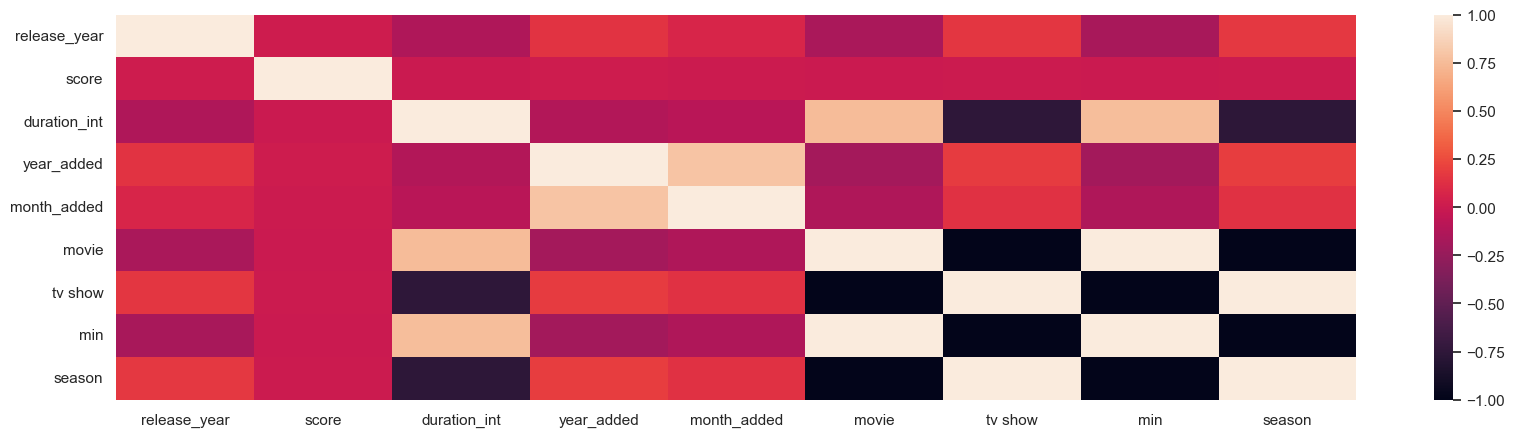

In [32]:
sns.heatmap(dataset.corr());

```fix
Vemos que existe una correlacion entre movie y min, y tv show y season (como era de esperarse).
Tambien vemos que score no tiene relación con ninguna de estas variables
Vemos correlaciones entre el año y mes agregados y que sea pelicula.
```

In [33]:
#Queremos saber si existe alguna correlacion entre el rating y el score.
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           22998 non-null  object 
 1   title          22998 non-null  object 
 2   director       22998 non-null  object 
 3   cast           22998 non-null  object 
 4   country        22998 non-null  object 
 5   release_year   22998 non-null  int64  
 6   rating_x       22998 non-null  object 
 7   listed_in      22998 non-null  object 
 8   description    22998 non-null  object 
 9   id             22998 non-null  object 
 10  score          22998 non-null  float64
 11  duration_int   22998 non-null  int64  
 12  duration_type  22998 non-null  object 
 13  year_added     22998 non-null  int32  
 14  month_added    22998 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(10)
memory usage: 2.5+ MB


In [34]:
#Dropeamos las columnas que no son de interés.
data2.drop('id', axis = 1, inplace = True)
data2.drop('title', axis = 1, inplace = True)
data2.drop('director',axis = 1, inplace = True )
data2.drop('cast',axis = 1, inplace = True )
data2.drop('country',axis = 1, inplace = True )
data2.drop('description',axis = 1, inplace = True)
data2.drop('listed_in',axis = 1, inplace = True)
data2.drop('release_year',axis = 1, inplace = True)
data2.drop('duration_int',axis = 1, inplace = True)
data2.drop('duration_type',axis = 1, inplace = True)
data2.drop('year_added',axis = 1, inplace = True)
data2.drop('month_added',axis = 1, inplace = True)
data2.drop('type',axis = 1, inplace = True)

In [35]:
data2.head()

,type,release_year,rating_x,score,duration_int,duration_type,year_added,month_added
0,movie,2020,pg-13,3.611111,90,min,2021,9
1,tv show,2021,tv-ma,3.552632,2,season,2021,9
2,tv show,2021,tv-ma,3.597938,1,season,2021,9
3,tv show,2021,tv-ma,3.561616,1,season,2021,9
4,tv show,2021,tv-ma,3.593023,2,season,2021,9


Uniformizamos la columna. 
Usamos la información de esta página.
https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ

In [37]:
data2['rating_x'].replace('g','Kids', inplace= True)
data2['rating_x'].replace('tv-g','Kids', inplace= True)
data2['rating_x'].replace('all','Kids', inplace= True)
data2['rating_x'].replace('tv-y','Kids', inplace= True)
data2['rating_x'].replace('all_ages','Kids', inplace= True)
data2['rating_x'].replace('pg','Older kids', inplace= True)
data2['rating_x'].replace('tv-pg','Older kids', inplace= True)
data2['rating_x'].replace('tv-y7','Older kids', inplace= True)
data2['rating_x'].replace('tv-y7-fv','Older kids', inplace= True)
data2['rating_x'].replace('7+','Older kids', inplace= True)
data2['rating_x'].replace('pg-13','Teens', inplace= True)
data2['rating_x'].replace('nc-17','Teens', inplace= True)
data2['rating_x'].replace('13+','Teens', inplace= True)
data2['rating_x'].replace('16+','Young Adults', inplace= True)
data2['rating_x'].replace('16','Young Adults', inplace= True)
data2['rating_x'].replace('tv-14','Young Adults', inplace= True)
data2['rating_x'].replace('ages_16_','Young Adults', inplace= True)
data2['rating_x'].replace('tv-nr','Adults', inplace= True)
data2['rating_x'].replace('18+','Adults', inplace= True)
data2['rating_x'].replace('unrated','Adults', inplace= True)
data2['rating_x'].replace('tv-ma','Adults', inplace= True)
data2['rating_x'].replace('r','Adults', inplace= True)
data2['rating_x'].replace('ages_18_','Adults', inplace= True)

In [38]:
#Verificamos
data2['rating_x'].value_counts()

Adults          7524
Young Adults    4688
Kids            4062
Older kids      3489
Teens           3235
Name: rating_x, dtype: int64

In [39]:
#Usamos ordinal encoder, puesto que la columna tiene datos que tienen cierto orden.
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'rating_x', 'mapping': {'Kids': 0, 'Older kids': 1,'Teens':2, 'Young Adults':3, 'Adults': 4}}]
oe = OrdinalEncoder(mapping=maplist)
data2 = oe.fit_transform(data2)

In [40]:
#Verificamos el mapeo
data2['rating_x'].value_counts()

4    7524
3    4688
0    4062
1    3489
2    3235
Name: rating_x, dtype: int64

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating_x  22998 non-null  int32  
 1   score     22998 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 269.6 KB


In [44]:
data2.corr()

,rating_x,score
rating_x,1.00000,0.00105
score,0.00105,1.00000


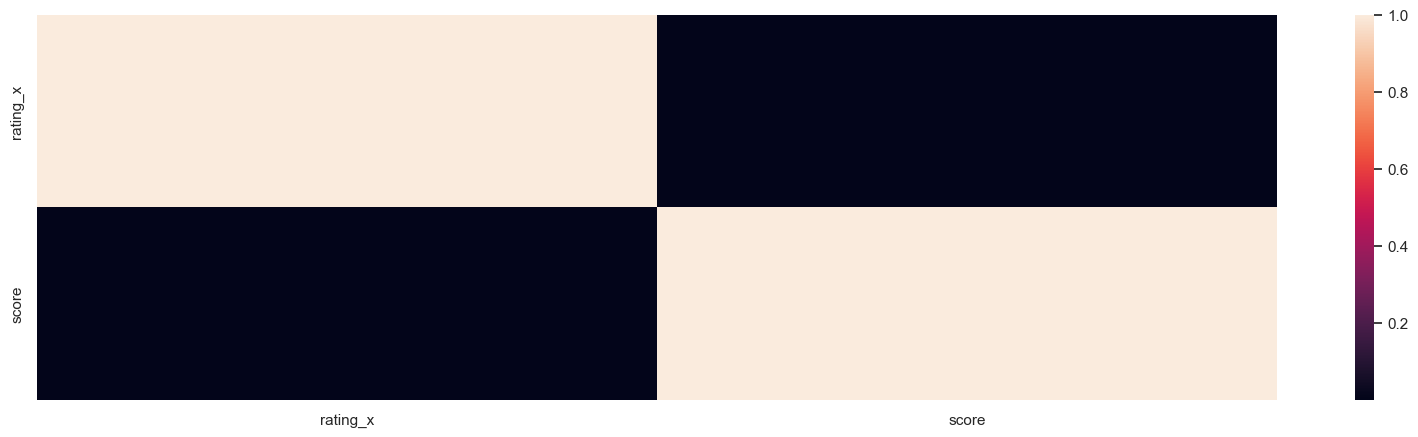

In [43]:
sns.heatmap(data2.corr());

<AxesSubplot: ylabel='score'>

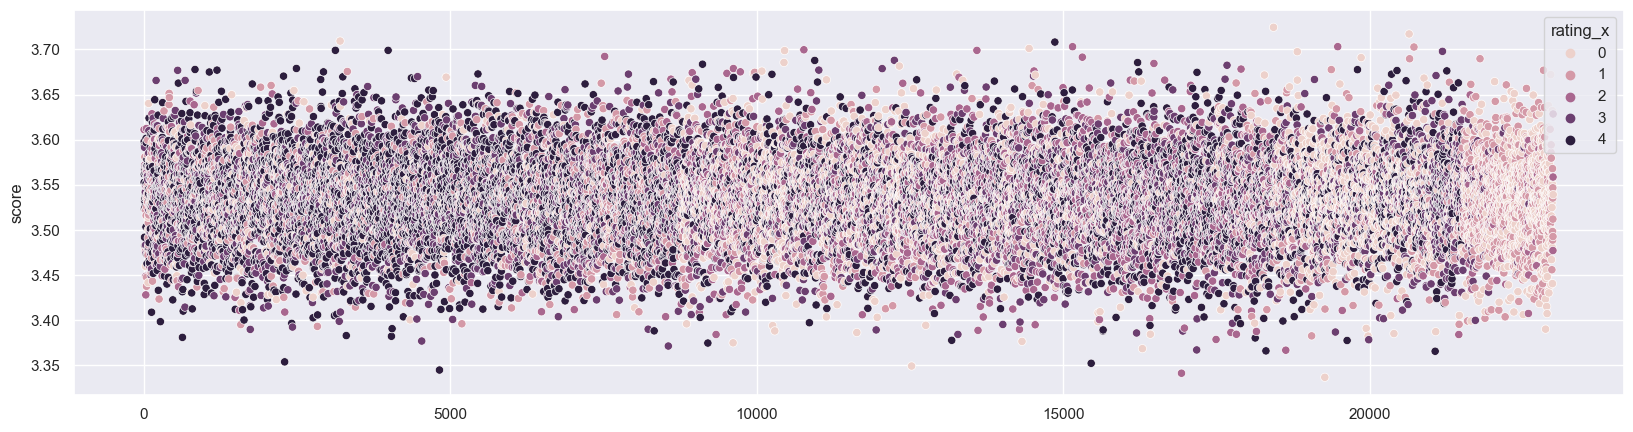

In [45]:
#Realizamos un scatterplot. Vemos que existen puntos de todos los colores para diferentes scores. 
sns.scatterplot(data=data2, x=data2.index, y='score', hue='rating_x')

In [46]:
#Vemos que no hay correlacion entre el score y ninguna de las categorias.
#Pero si agrupamos categorizamos el score?
data2.score.value_counts(bins=5)

(3.492, 3.569]    13095
(3.569, 3.647]     5183
(3.414, 3.492]     4340
(3.647, 3.725]      216
(3.335, 3.414]      164
Name: score, dtype: int64

In [47]:
#Reemplazamos valores en la columna
data2.score = np.where( (data2.score > 3.647) & (data2.score < 3.725) , 5, data2.score)
data2.score = np.where( (data2.score > 3.569) & (data2.score <= 3.647) , 4, data2.score)
data2.score = np.where( (data2.score > 3.492) & (data2.score <= 3.569) , 3, data2.score)
data2.score = np.where( (data2.score > 3.414) & (data2.score <= 3.492) , 2, data2.score)
data2.score = np.where( (data2.score > 3.335) & (data2.score <= 3.414) , 1, data2.score)

In [48]:
data2.corr()

,rating_x,score
rating_x,1.000000,0.004638
score,0.004638,1.000000


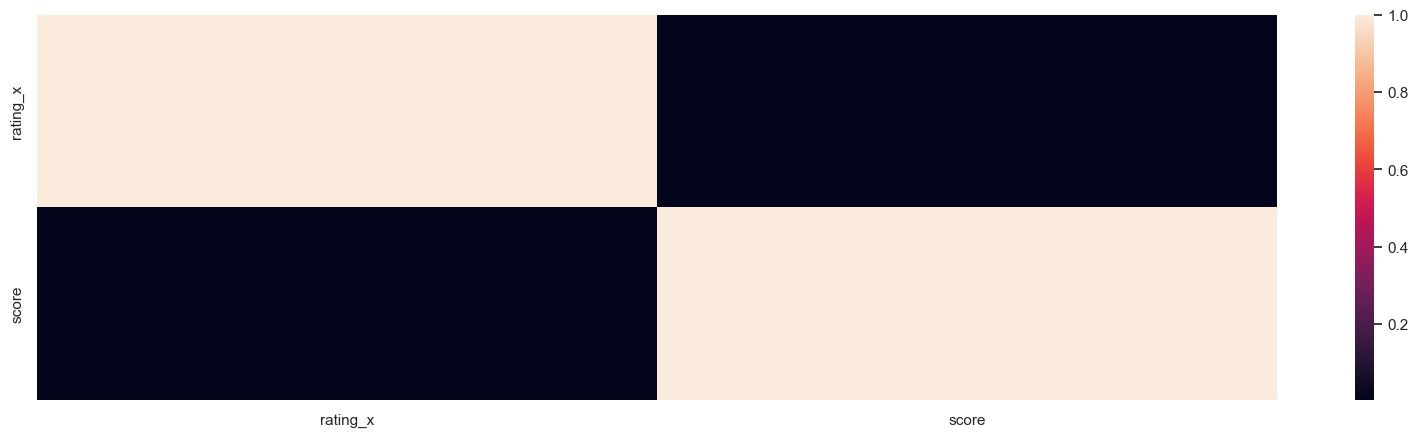

In [49]:
sns.heatmap(data2.corr());

Tampoco hay correlación.

Tiempo de ejecución del notebook: 5 min.